Imports!

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


Train & Test data

In [56]:
# Set up training dataset
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/sethg/OneDrive/Desktop/CatDog/training_set',
    batch_size=32,
    image_size=(224, 224))

# Set up testing dataset
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/sethg/OneDrive/Desktop/CatDog/test_set',
    batch_size=32,
    image_size=(224, 224))

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


Data preprocessing

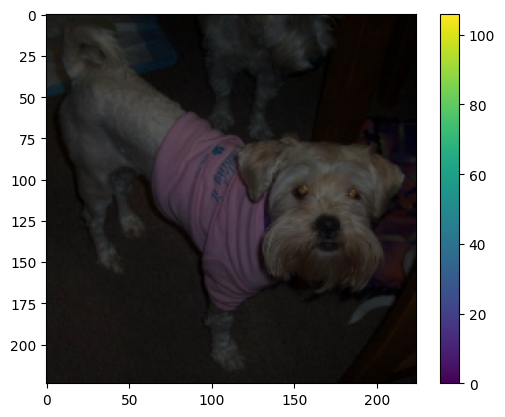

In [57]:
# Extract a single batch from the training set
batch = next(iter(training_set))

# Apply the preprocessing factor
factor = 0.5
image = np.clip(batch[0] * factor, 0, 255).astype(np.uint8)

# Plot the preprocessed image
plt.imshow(image[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [58]:
# Scale values to a range of 0 to 1 before feeding them to the NN
training_set = training_set.map(lambda x, y: (x / 255.0, y))
test_set = test_set.map(lambda x, y: (x / 255.0, y))

Build the model

In [59]:
model = tf.keras.models.Sequential([
    # 32 filters of 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),

    # reduce dimensionality by half
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 64 filters of 3x3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # reduce dimensionality by half
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 128 filters of 3x3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # reduce dimensionality by half
    tf.keras.layers.MaxPooling2D((2, 2)),

    # flatten into one-dimensional vector
    tf.keras.layers.Flatten(),

    # 128 unit dense layer
    tf.keras.layers.Dense(128, activation='relu'),

    # final classifier
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile the model

In [60]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Feed the model

In [61]:
model.fit(training_set, epochs=5, validation_data=test_set)

Epoch 1/5
251/251 [==============================] - 138s 546ms/step - loss: 0.6907 - accuracy: 0.5759 - val_loss: 0.6059 - val_accuracy: 0.6535
Epoch 2/5
251/251 [==============================] - 136s 540ms/step - loss: 0.5733 - accuracy: 0.7001 - val_loss: 0.5943 - val_accuracy: 0.6945
Epoch 3/5
251/251 [==============================] - 145s 576ms/step - loss: 0.5193 - accuracy: 0.7358 - val_loss: 0.5754 - val_accuracy: 0.7079
Epoch 4/5
251/251 [==============================] - 136s 538ms/step - loss: 0.4406 - accuracy: 0.7898 - val_loss: 0.6331 - val_accuracy: 0.7168
Epoch 5/5
251/251 [==============================] - 138s 549ms/step - loss: 0.3378 - accuracy: 0.8481 - val_loss: 0.6866 - val_accuracy: 0.7311


Evaluate accuracy

In [62]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
test_acc = int(test_acc*100)
print(f'\nTest accuracy: {test_acc}%')

64/64 - 7s - loss: 0.6866 - accuracy: 0.7311 - 7s/epoch - 115ms/step

Test accuracy: 73%


Make predictions

In [63]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [64]:
predictions = probability_model.predict(test_set)

64/64 [==============================] - 7s 110ms/step


Test your pet!

Found 3 files belonging to 2 classes.


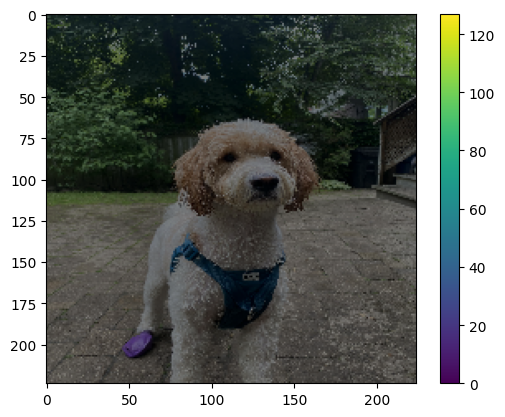

In [65]:
pet_images = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/sethg/OneDrive/Desktop/CatDog/personal',
    batch_size=3, # number of pets to classify
    image_size=(224, 224))

# Extract a single batch from the training set
batch = next(iter(pet_images))

# Apply the preprocessing factor
factor = 0.5
image = np.clip(batch[0] * factor, 0, 255).astype(np.uint8)

# Plot the preprocessed image
plt.imshow(image[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [66]:
pet_images = pet_images.map(lambda x, y: (x / 255.0, y))

In [67]:
prediction = probability_model.predict(test_set)

64/64 [==============================] - 7s 111ms/step


1/1 [==============================] - 0s 53ms/step


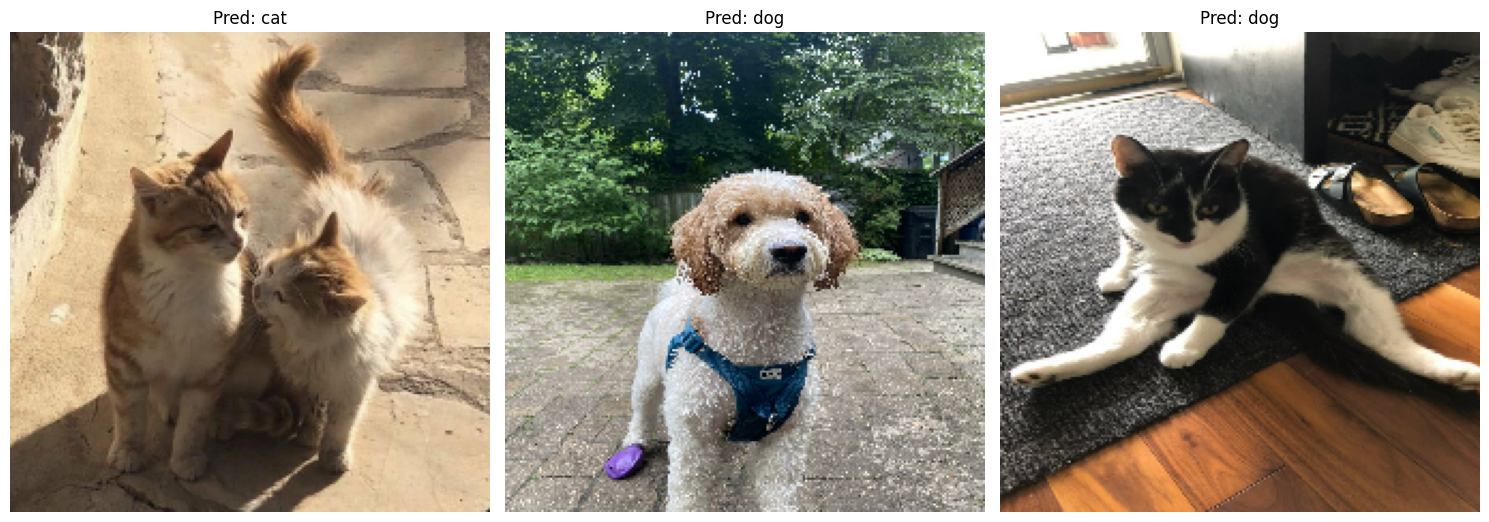

In [68]:
batch = pet_images.take(1)
images, labels = next(iter(batch))

# Get the predicted labels for the images using the trained model
predictions = model.predict(images)

# Plot the images and their true/predicted labels
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
axs = axs.flatten()
corrects = 0
for i in range(len(axs)):
    # Plot the image
    axs[i].imshow(np.squeeze(images[i]))
    axs[i].axis('off')
    
    # Set the predicted label
    pred_label = 'cat' if predictions[i] < 0.5 else 'dog'

    title = f'Pred: {pred_label}'
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

